In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [4]:
file_path = r"C:\Users\dipak\OneDrive\Desktop\github_ai\ml_with_python\three_module\creditcard.csv"

In [5]:
raw_data = pd.read_csv(file_path)

In [6]:
raw_data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
112044,72488.0,1.278061,0.480101,-0.118580,1.110239,0.007263,-1.202533,0.528901,-0.336875,-0.228962,...,-0.001218,0.040174,-0.140618,0.397477,0.841722,-0.295285,-0.009945,0.010135,0.89,0
209281,137489.0,-2.178836,1.787165,-0.599474,-0.474527,-1.094959,0.273586,-1.337609,1.965594,0.535331,...,0.340214,0.625850,-0.090898,0.008056,-0.047786,-0.149978,-0.229390,0.023782,11.50,0
100596,67562.0,-1.040777,0.033330,2.874954,-1.577354,-1.200074,0.847332,-1.082061,-0.265158,-0.056184,...,0.934107,0.596226,-0.357370,0.065686,0.591438,-0.104305,0.381461,0.123958,0.80,0
201333,133839.0,-1.811148,1.060051,0.155795,-0.881039,1.070855,1.059259,0.324965,0.463271,0.883903,...,-0.370246,-0.367402,0.497607,-0.479522,-0.730714,0.161691,0.559056,0.496943,22.99,0
63867,50899.0,1.095988,0.446004,1.185860,2.437274,-0.470732,-0.071025,-0.260968,0.077202,-0.857049,...,0.219323,0.614035,-0.060311,0.571751,0.405838,0.063252,0.013862,0.024640,10.65,0


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
labels = raw_data.Class.unique()

In [10]:
labels

array([0, 1], dtype=int64)

In [11]:
sizes = raw_data.Class.value_counts().values

In [12]:
sizes

array([284315,    492], dtype=int64)

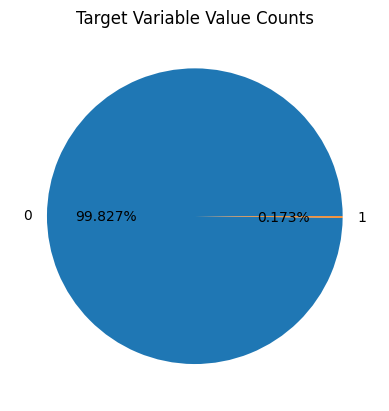

In [13]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title("Target Variable Value Counts")
plt.show()

In [14]:
corr_value = raw_data.corr()["Class"].drop("Class")

<Axes: >

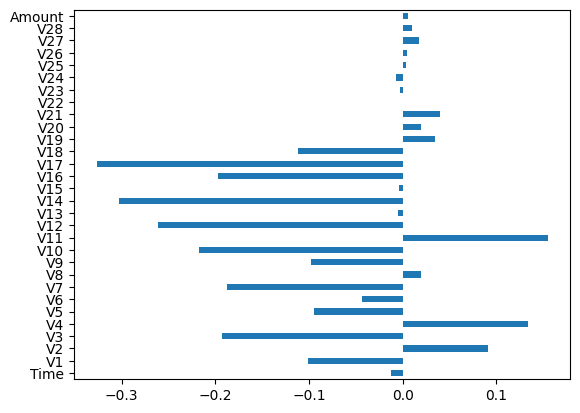

In [17]:
corr_value.plot(kind = "barh")

In [18]:
raw_data.iloc[:,1:30] = StandardScaler().fit_transform(raw_data.iloc[:,1:30])

In [19]:
type(raw_data)

pandas.core.frame.DataFrame

In [21]:
X = raw_data.values[:,1:30]

In [22]:
Y = raw_data["Class"]

In [52]:
X = normalize(X, norm="l1")

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

In [61]:
w_train = compute_sample_weight('balanced', y_train)

In [62]:
tree_model = DecisionTreeClassifier()

In [63]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
tree_predict = tree_model.predict(X_test)

In [65]:
roc_score = roc_auc_score(tree_predict, y_test)

In [66]:
svm_model = LinearSVC()

In [67]:
svm_model.fit(X_train,y_train)

LinearSVC()

In [68]:
svm_prediction = svm_model.predict(X_test)

In [69]:
roc_auc_score_svm = roc_auc_score(svm_prediction,y_test)

In [70]:
roc_auc_score_svm

0.8847221060252051

In [71]:
# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [72]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [73]:
dt_prediction = dt.predict(X_test)
svm_prediction = svm.predict(X_test)

In [74]:
dt_roc = roc_auc_score(dt_prediction,y_test)
svm_roc = roc_auc_score(svm_prediction,y_test)

In [75]:
print("dt_roc: ",dt_roc)
print("svm_roc: ", svm_roc)

dt_roc:  0.5194114320974997
svm_roc:  0.504512175467318


In [76]:
new_corr = corr_value.sort_values(ascending=False)

In [87]:
top_feature_columns = list(new_corr[:6].index)

In [89]:
X = X[top_feature_columns]

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

In [91]:
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)

c:\Users\dipak\.conda\envs\env2\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [92]:
dt_prediction = dt.predict(X_test)
svm_prediction = svm.predict(X_test)

In [93]:
roc_auc_score_dt = roc_auc_score(y_test,dt_prediction)
roc_auc_score_svm = roc_auc_score(y_test,svm_prediction)

In [94]:
print("roc_dt: ",roc_auc_score_dt)
print("roc_svm_dt: ", roc_auc_score_svm)

roc_dt:  0.7866650657590336
roc_svm_dt:  0.7502109164202097


Conclusion: We can see the increase in roc score when top features are included and features with less corr value is removed. 